# Combine Data EDA by Qiaoying Zhang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import colorcet as cc
import matplotlib.pyplot as plt
from geopy.distance import distance

In [2]:
# States abbriviation:
# https://stackoverflow.com/questions/66572349/python-sub-state-names-for-abbrev-via-python-dict-with-re-sub
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [3]:
states = {value: key for key, value in states.items()}
states

{'Alaska': 'AK',
 'Alabama': 'AL',
 'Arkansas': 'AR',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'District of Columbia': 'DC',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Iowa': 'IA',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Massachusetts': 'MA',
 'Maryland': 'MD',
 'Maine': 'ME',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Missouri': 'MO',
 'Northern Mariana Islands': 'MP',
 'Mississippi': 'MS',
 'Montana': 'MT',
 'National': 'NA',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Nebraska': 'NE',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'Nevada': 'NV',
 'New York': 'NY',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 

In [4]:
states['Alaska']

'AK'

In [5]:
# Load in Datasets
# State coordinates:
# https://gist.github.com/rebecca-sich/1c422acc1b222b8a04fcd3cfae79bc18

df = pd.read_csv('merge_final.csv')
statesDF = pd.read_csv('states.csv')
distancesDF = pd.DataFrame(columns=["State1", "State2", "distance"])

# get distance between states
for state1, lat1, lon1 in zip(statesDF.state, statesDF.latitude, statesDF.longitude):
    for state2, lat2, lon2 in zip(statesDF.state, statesDF.latitude, statesDF.longitude):
        new_data= pd.DataFrame({
            "State1": [states[state1]],
            "State2": [states[state2]],
            "distance": [distance((lat1, lon1), (lat2, lon2)).miles]
            })
        
        distancesDF = pd.concat([distancesDF, new_data], ignore_index=True)

distancesDF.head()

C:\Users\qiaoy\AppData\Local\Temp\ipykernel_12296\897915139.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distancesDF = pd.concat([distancesDF, new_data], ignore_index=True)


,State1,State2,distance
0,AL,AL,0.000000
1,AL,AK,3476.952449
2,AL,AZ,1433.460157
3,AL,AR,354.170490
4,AL,CA,1867.241601


In [6]:
df = df.merge(distancesDF, on=['State1','State2'])
df.to_csv('air_merge.csv', index=False)

df.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarriersMktShare,CarrierAvgFare,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance
0,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.255775
1,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.255775
2,2006,3,OR,9.894872,60.482353,11.634091,WA,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.255775
3,1997,1,OR,5.538889,111.128571,11.460000,WA,3.626667,105.488462,14.235294,...,0.36,74.00,75,0.84,100,0.07,2.0,3563198.0,3241811.0,238.255775
4,1997,1,OR,5.538889,111.128571,11.460000,WA,3.626667,105.488462,14.235294,...,0.36,74.00,75,0.84,100,0.07,2.0,3189728.0,2946198.0,238.255775


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34503 entries, 0 to 34502
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34503 non-null  int64  
 1   Quarter                   34503 non-null  int64  
 2   State1                    34503 non-null  object 
 3   temperature1              34503 non-null  float64
 4   precepitation1            34503 non-null  float64
 5   windspeed1                34503 non-null  float64
 6   State2                    34503 non-null  object 
 7   temperature2              34503 non-null  float64
 8   precepitation2            34503 non-null  float64
 9   windspeed2                34503 non-null  float64
 10  airlineID                 34503 non-null  int64  
 11  Carrier                   34503 non-null  object 
 12  Passengers_by_Carrier     34503 non-null  int64  
 13  Total_Mkt_Fare            34503 non-null  float64
 14  Carrie

In [8]:
df = df[~df.TDOMT_GALLONS.isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34501 entries, 0 to 34502
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34501 non-null  int64  
 1   Quarter                   34501 non-null  int64  
 2   State1                    34501 non-null  object 
 3   temperature1              34501 non-null  float64
 4   precepitation1            34501 non-null  float64
 5   windspeed1                34501 non-null  float64
 6   State2                    34501 non-null  object 
 7   temperature2              34501 non-null  float64
 8   precepitation2            34501 non-null  float64
 9   windspeed2                34501 non-null  float64
 10  airlineID                 34501 non-null  int64  
 11  Carrier                   34501 non-null  object 
 12  Passengers_by_Carrier     34501 non-null  int64  
 13  Total_Mkt_Fare            34501 non-null  float64
 14  CarriersMkt

In [9]:
df.drop(columns='Carrier', inplace=True)

In [10]:
# get all states in the dataset
states1 = df.State1.unique()
states2 = df.State2.unique()
states = list(np.unique(np.append(states1, states2)))

print(states)

['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV']


In [11]:
state_dict = {x: index for index, x in enumerate(states, start=1)}

print(state_dict)

{'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'FL': 8, 'GA': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'ME': 18, 'MI': 19, 'MN': 20, 'MO': 21, 'MS': 22, 'MT': 23, 'NC': 24, 'NE': 25, 'NH': 26, 'NJ': 27, 'NM': 28, 'NV': 29, 'NY': 30, 'OH': 31, 'OK': 32, 'OR': 33, 'PA': 34, 'SC': 35, 'TN': 36, 'TX': 37, 'UT': 38, 'VA': 39, 'VT': 40, 'WA': 41, 'WI': 42, 'WV': 43}


In [12]:
# extract coded dataset
df = df.replace({'State1': state_dict, 'State2': state_dict})
df.to_csv('num_air.csv', index=False)

df.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarriersMktShare,CarrierAvgFare,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance
0,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.255775
1,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.255775
2,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.59,80.44,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.255775
3,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,0.36,74.00,75,0.84,100,0.07,2.0,3563198.0,3241811.0,238.255775
4,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,0.36,74.00,75,0.84,100,0.07,2.0,3189728.0,2946198.0,238.255775


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34501 entries, 0 to 34502
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      34501 non-null  int64  
 1   Quarter                   34501 non-null  int64  
 2   State1                    34501 non-null  int64  
 3   temperature1              34501 non-null  float64
 4   precepitation1            34501 non-null  float64
 5   windspeed1                34501 non-null  float64
 6   State2                    34501 non-null  int64  
 7   temperature2              34501 non-null  float64
 8   precepitation2            34501 non-null  float64
 9   windspeed2                34501 non-null  float64
 10  airlineID                 34501 non-null  int64  
 11  Passengers_by_Carrier     34501 non-null  int64  
 12  Total_Mkt_Fare            34501 non-null  float64
 13  CarriersMktShare          34501 non-null  float64
 14  CarrierAvgF

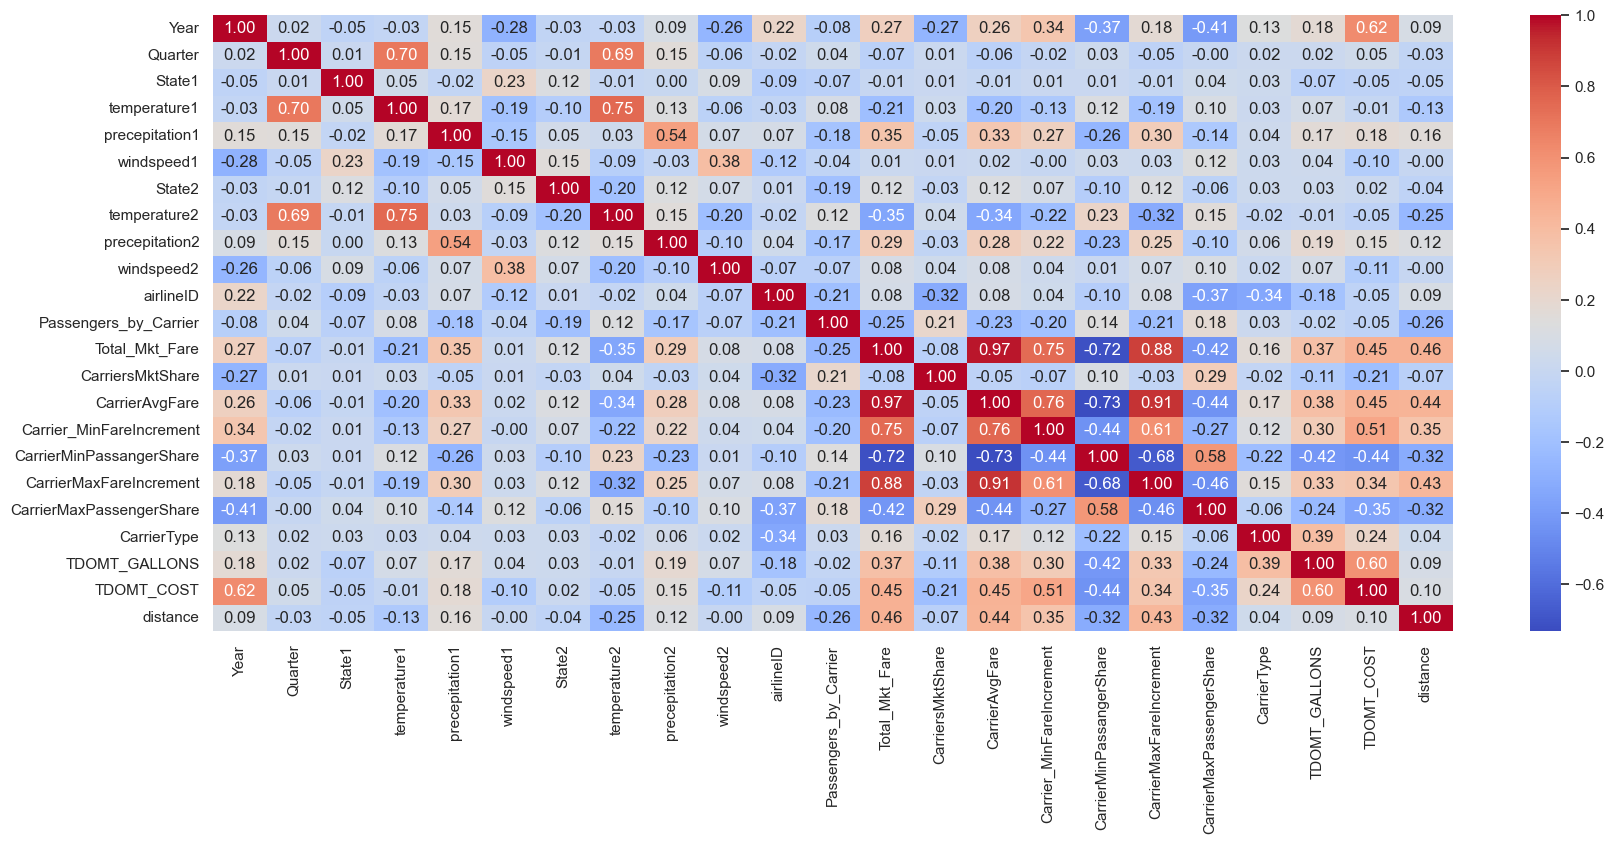

In [14]:
sns.set(rc={'figure.figsize':(20,8)})
hm = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [15]:
# sns.pairplot(df)

In [16]:
# make new field 'Cost_Per_Gallon'
df['Cost_Per_Gallon'] = df.TDOMT_COST/df.TDOMT_GALLONS

In [17]:
df.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarrierAvgFare,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance,Cost_Per_Gallon
0,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,80.44,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.255775,1.642847
1,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,80.44,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.255775,1.600253
2,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,80.44,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.255775,1.448192
3,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,74.00,75,0.84,100,0.07,2.0,3563198.0,3241811.0,238.255775,0.909804
4,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,74.00,75,0.84,100,0.07,2.0,3189728.0,2946198.0,238.255775,0.923652


<Axes: xlabel='Year', ylabel='Cost_Per_Gallon'>

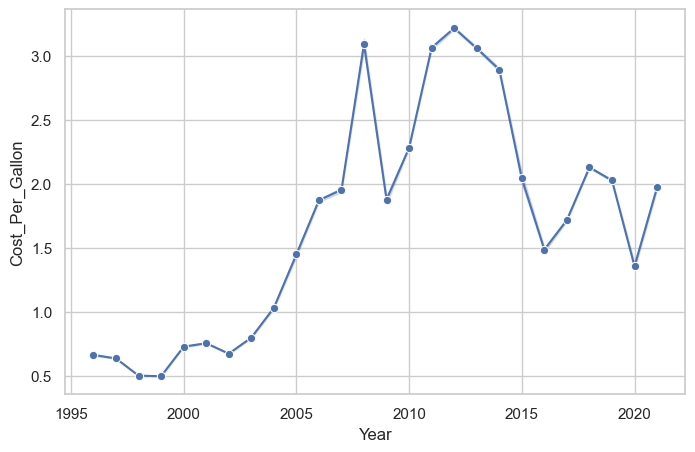

In [18]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.lineplot(data=df, x='Year', y='Cost_Per_Gallon', marker='o')

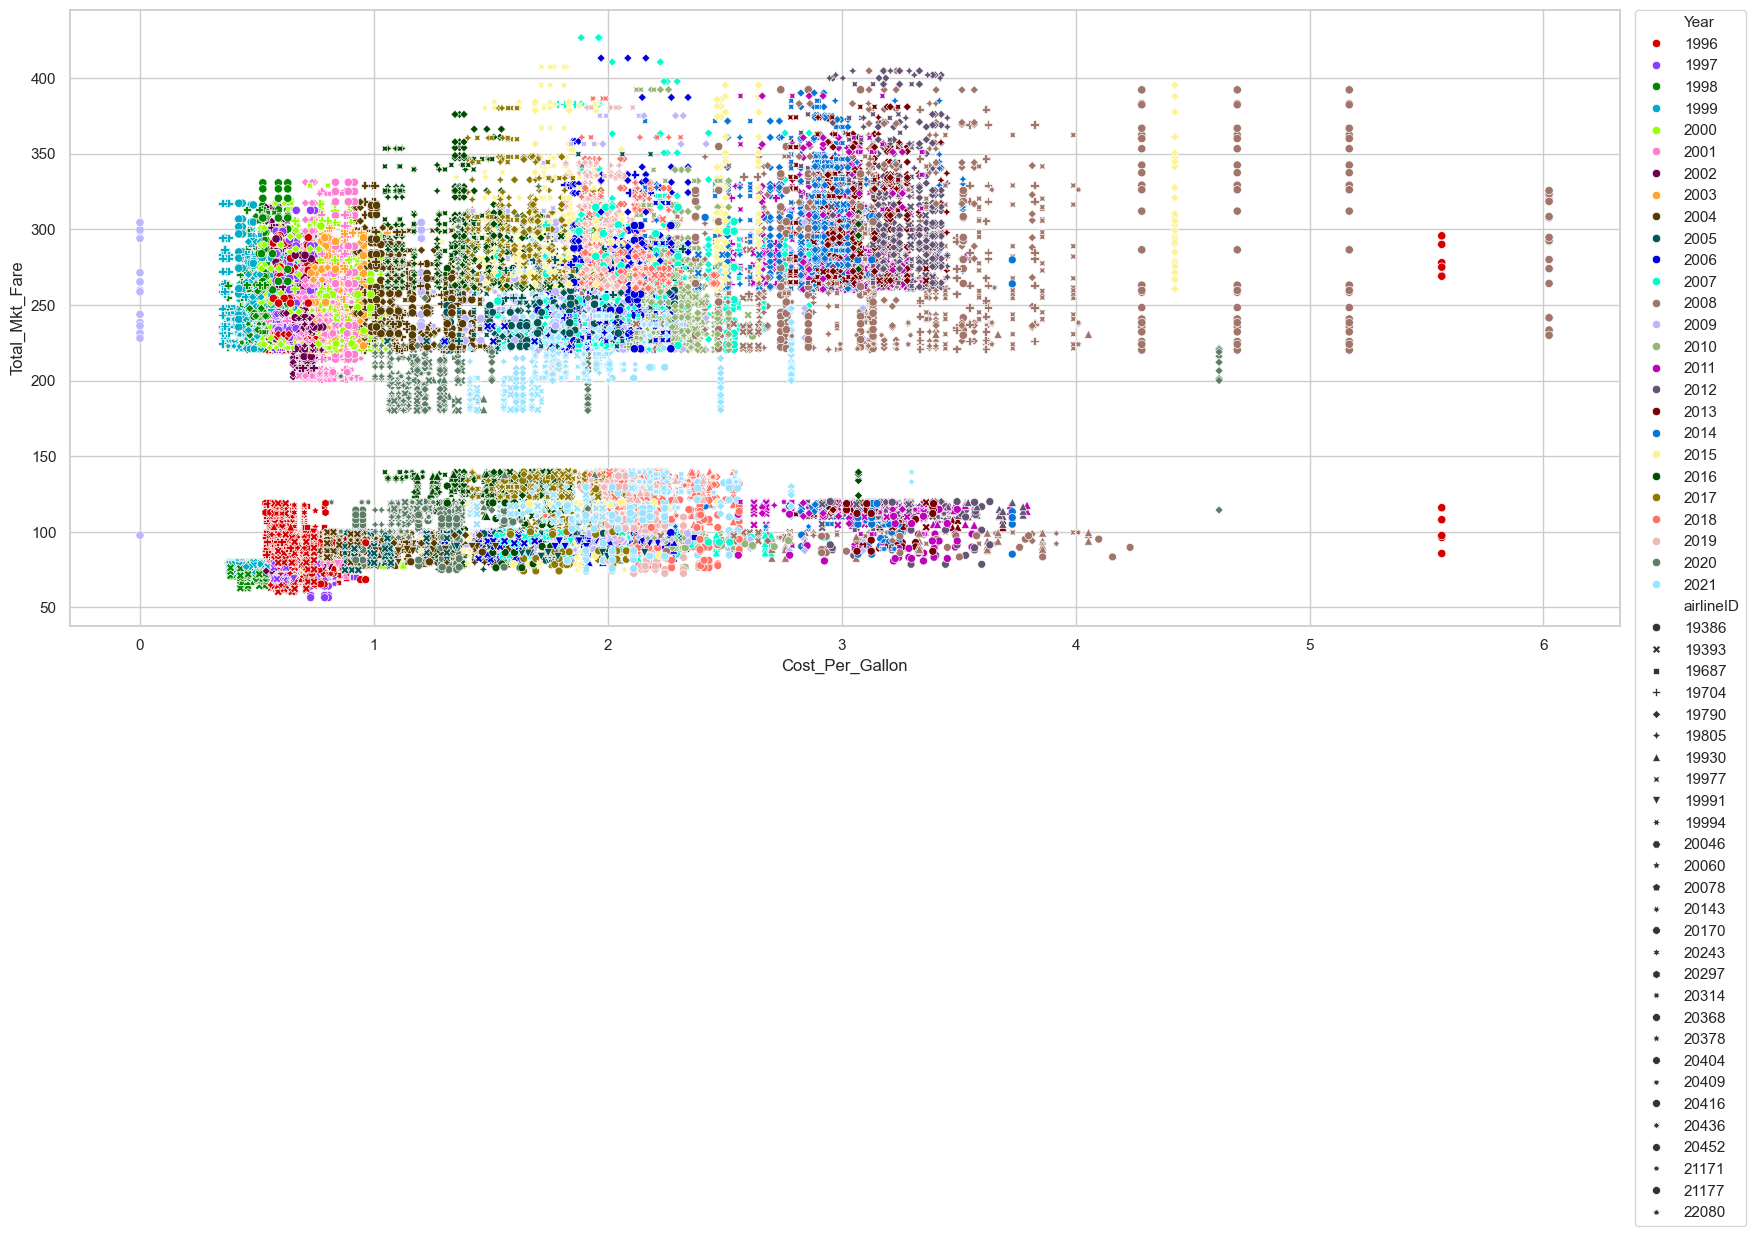

In [19]:
palette = sns.color_palette(cc.glasbey, 26)

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='Cost_Per_Gallon', y='Total_Mkt_Fare', hue='Year', style='airlineID', palette=palette)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

In [20]:
# make new field 'Total_precepitation': precipitation sum of two states
df['Total_precepitation'] = df.precepitation1 + df.precepitation2

In [21]:
df.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,Carrier_MinFareIncrement,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance,Cost_Per_Gallon,Total_precepitation
0,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,75,0.44,125,0.25,3.0,120723849.0,198330840.0,238.255775,1.642847,106.736520
1,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,75,0.44,125,0.25,3.0,122313419.0,195732437.0,238.255775,1.600253,106.736520
2,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,75,0.44,125,0.25,3.0,115493227.0,167256388.0,238.255775,1.448192,106.736520
3,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,75,0.84,100,0.07,2.0,3563198.0,3241811.0,238.255775,0.909804,216.617033
4,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,75,0.84,100,0.07,2.0,3189728.0,2946198.0,238.255775,0.923652,216.617033


<Axes: xlabel='Total_precepitation', ylabel='Total_Mkt_Fare'>

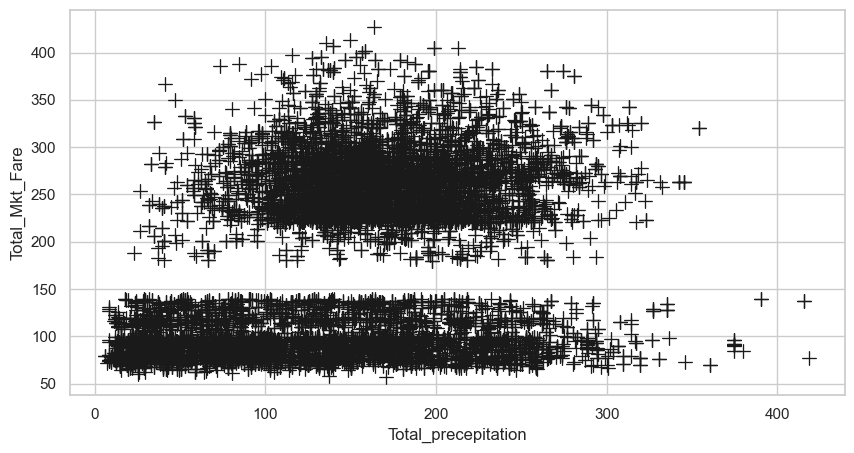

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='Total_precepitation', y='Total_Mkt_Fare', s=100, color='.1', marker='+')

In [23]:
# make new field 'Average_increment'
df['Average_increment'] = (df.Carrier_MinFareIncrement + df.CarrierMaxFareIncrement)/2

In [24]:
df.head()

,Year,Quarter,State1,temperature1,precepitation1,windspeed1,State2,temperature2,precepitation2,windspeed2,...,CarrierMinPassangerShare,CarrierMaxFareIncrement,CarrierMaxPassengerShare,CarrierType,TDOMT_GALLONS,TDOMT_COST,distance,Cost_Per_Gallon,Total_precepitation,Average_increment
0,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.44,125,0.25,3.0,120723849.0,198330840.0,238.255775,1.642847,106.736520,100.0
1,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.44,125,0.25,3.0,122313419.0,195732437.0,238.255775,1.600253,106.736520,100.0
2,2006,3,33,9.894872,60.482353,11.634091,41,10.280769,46.254167,12.184615,...,0.44,125,0.25,3.0,115493227.0,167256388.0,238.255775,1.448192,106.736520,100.0
3,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,0.84,100,0.07,2.0,3563198.0,3241811.0,238.255775,0.909804,216.617033,87.5
4,1997,1,33,5.538889,111.128571,11.460000,41,3.626667,105.488462,14.235294,...,0.84,100,0.07,2.0,3189728.0,2946198.0,238.255775,0.923652,216.617033,87.5


<Axes: xlabel='Year', ylabel='Average_increment'>

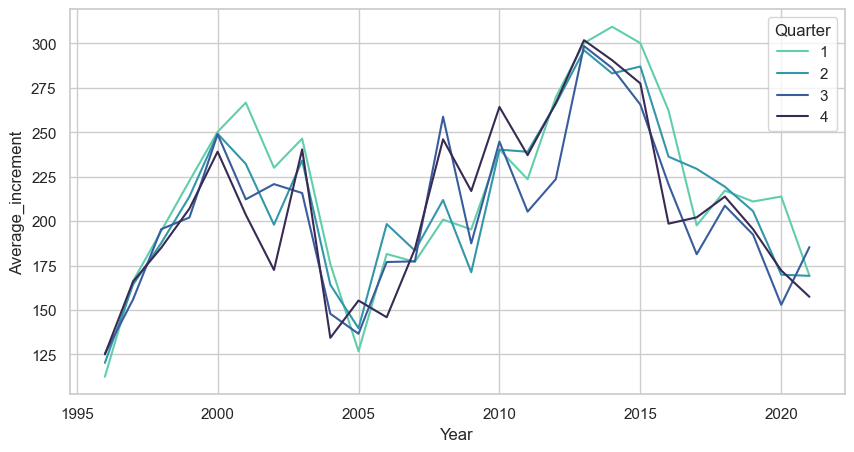

In [25]:
palette = sns.color_palette("mako_r", 4)
sns.lineplot(data=df, x='Year', y='Average_increment', hue='Quarter', errorbar=None, palette=palette)